# Step 1: Business Understanding

Business problem: I purchased a house in The Netherlands in 2019 in the city of Amersfoort. Now I want to check if this is expected to be a good investment, or that I should have choosen another city instead.  For privacy purposes I will consider an average house in Amersfoort, and as housing price I will consider the average WOZ value (the value that the government considers for tax purposes)

Data analysis to do:
- I need to analyze the trend in the housing prices over the last 5 years for NL and Amersfoort and compare these. That comparison will show me if the housing prices in Amersfoort grow/decline harder then the rest of the Netherlands (NL). 

- Then I will then model the historic trends in NL and Amersfoort to see how these prices will develop in the next year. 

Business Questions to address
- What is the average price increase for houses in The Netherlands in 2023 compared to 2019: 
- What is the average price increase for houses in the municipality Amersfoort in 2023 compared to 2019
- What is the predicted average price increase for houses in The Netherlands for 2024 compared to 2019
- What is the predicted average price increase for houses in Amersfoort for 2024 compared to 2019

# Step 2: Data Understanding

Data gathering: 

I downloaded a dataset of the housing prices in the Netherlands (called 'WOZ value') and I filtered for all available years (2019 - 2023), please see this link: 
https://opendata.cbs.nl/#/CBS/nl/dataset/85036NED/table?ts=1690792617736 

I named the file with the downloaded data: Gemiddelde_WOZ_waarde_van_woningen_op_1_januari__eigendom__regio__31072023_104354.csv

Initially I wanted to use the API to dowload all data, but that was blocked due to an internal restriction within my company for downloading data

In [24]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual file path of your CSV file.
file_path = 'Gemiddelde_WOZ_waarde_van_woningen_op_1_januari__eigendom__regio__31072023_104354.csv'

# Specify the line numbers to skip, note last line is also skipped
lines_to_skip = [0, 1, 2, 4, 5, 366]

# Read the CSV file into a pandas DataFrame, skipping the specified lines and using ";" as the delimiter.
df = pd.read_csv(file_path, skiprows=lines_to_skip, sep=';')

# View the upper 5 rows of the dataframe
df.head(5)


,Perioden,2019,2020,2021,2022**,2023*
0,Aa en Hunze,241.0,257.0,271.0,298.0,342.0
1,Aalsmeer,337.0,361.0,383.0,427.0,495.0
2,Aalten,209.0,223.0,238.0,265.0,314.0
3,Achtkarspelen,182.0,192.0,206.0,226.0,256.0
4,Alblasserdam,217.0,234.0,252.0,274.0,325.0


In [25]:
# Some data cleaning to make sure column names are correct

# Create a dictionary to map the current column names to the new names.
column_mapping = {
    'Perioden': 'Municipalities',
    '2022**': '2022',
    '2023*': '2023'
}

# Rename the columns using the dictionary.
df.rename(columns=column_mapping, inplace=True)

df.tail()

,Municipalities,2019,2020,2021,2022,2023
355,Zundert,289.0,305.0,319.0,357.0,409.0
356,Zutphen,202.0,216.0,231.0,254.0,312.0
357,Zwartewaterland,216.0,225.0,237.0,262.0,297.0
358,Zwijndrecht,198.0,216.0,237.0,256.0,304.0
359,Zwolle,235.0,252.0,272.0,298.0,345.0


Assessing Data:

I assesed the data by looking at several aspects, like missing data, outliers, min/max/mean values, etc. 

In [26]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Municipalities  360 non-null    object 
 1   2019            355 non-null    float64
 2   2020            355 non-null    float64
 3   2021            352 non-null    float64
 4   2022            345 non-null    float64
 5   2023            342 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.0+ KB


In [27]:
# Display the statistical summary of the numerical columns in my DataFrame.
df.describe()

,2019,2020,2021,2022,2023
count,355.000000,355.000000,352.000000,345.000000,342.000000
mean,258.329577,277.070423,296.079545,324.405797,375.000000
std,67.246961,73.090595,76.721307,82.706598,94.418548
min,131.000000,138.000000,148.000000,167.000000,194.000000
25%,215.500000,230.500000,246.000000,270.000000,314.250000
50%,250.000000,266.000000,284.500000,314.000000,363.000000
75%,291.000000,311.000000,331.000000,363.000000,416.750000
max,681.000000,735.000000,775.000000,830.000000,932.000000


Certain Municipalities are reorganized, so that's why there is a difference in the Count of Municipalities . Let's dive into this:

In [28]:
# Check for missing values in each row.
rows_with_missing_data = df.isnull().any(axis=1)

# Filter and display only the rows with missing data.
rows_with_missing_data_df = df[rows_with_missing_data]

# Count the number of rows in 'rows_with_missing_data_df'.
num_rows_with_missing_data = rows_with_missing_data_df.shape[0]

# Now 'num_rows_with_missing_data' contains the count of rows with missing data.
print("Number of rows with missing data:", num_rows_with_missing_data)


Number of rows with missing data: 23


In [29]:
rows_with_missing_data_df.head()

,Municipalities,2019,2020,2021,2022,2023
17,Appingedam,143.0,155.0,NaN,NaN,NaN
27,Beemster,369.0,405.0,429.0,NaN,NaN
48,Boxmeer,250.0,256.0,266.0,NaN,NaN
51,Brielle,237.0,258.0,277.0,306.0,NaN
62,Cuijk,225.0,238.0,256.0,NaN,NaN


Calculating trends for certain municipalities could have some bias because of the merger of municipalities over time. However, the city I consider does not have that merger and I'm interested in the comparison of Amersfoort against the rest of the Netherlands.

# Step 3: Data Preparation

Data cleaning:

I don't need a lot of data cleaning apart from what I had already done to read in the gathered data from my csv file. No outliers are observed. As expected, since this data comes from the central bureau of statistics and is already prepared carefully before publishing.


Data analyzing: 

I need to define 2 series of data for analzying: one with the average prices of NL and one with the prices of Amersfoort

In [30]:
# Calculate the average of all columns in the DataFrame, skipping the first column.
column_averages = df.iloc[:, 1:].mean()

# Create a new DataFrame containing the column averages
column_averages_df = pd.DataFrame(column_averages)

# Rename the column to 'NL'
column_averages_df.columns = ['NL']

# Create a DataFrame for Amersfoort row
amersfoort_row = df[df['Municipalities'] == 'Amersfoort'].iloc[:, 1:].T

# Rename the column to 'Amersfoort'
amersfoort_row.columns = ['Amersfoort']

# Combine both DataFrames for comparison
comparison_df = pd.concat([column_averages_df, amersfoort_row], axis=1)

# Round all numerical values in the DataFrame to one decimal place
rounded_comparison_df = comparison_df.round(1)

# Rename the index to 'Years'
rounded_comparison_df = rounded_comparison_df.rename_axis('Years')

# This table below shows the avg house prices (WOZ) of NL and Amersfoort over the last 5 years
rounded_comparison_df

,NL,Amersfoort
Years,,
2019,258.3,283.0
2020,277.1,306.0
2021,296.1,330.0
2022,324.4,367.0
2023,375.0,433.0


I can also vizualize this data to support any findings and gather insights

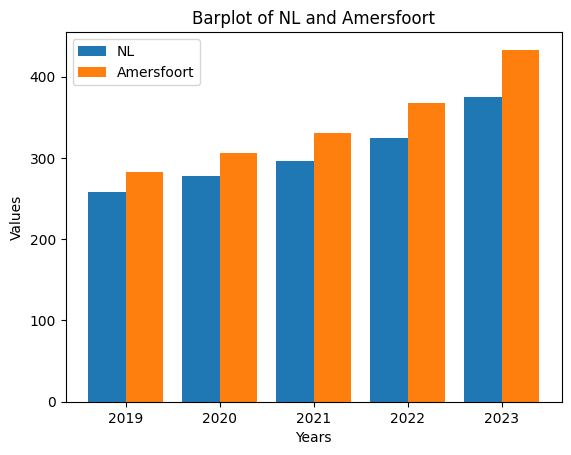

In [31]:
import matplotlib.pyplot as plt

# Convert the index to integers if they are strings
years = [int(year) for year in rounded_comparison_df.index]

# Get the values for NL and Amersfoort
NL = rounded_comparison_df['NL']
Amersfoort = rounded_comparison_df['Amersfoort']

# Plotting the barplot
fig, ax = plt.subplots()
width = 0.4  # Width of the bars

# Create bars for NL and Amersfoort columns, offsetting Amersfoort by the width
ax.bar([year - width/2 for year in years], NL, width, label='NL')
ax.bar([year + width/2 for year in years], Amersfoort, width, label='Amersfoort')

# Add labels, title and legend
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.set_title('Barplot of NL and Amersfoort')
ax.legend()

plt.xticks(years)  # Set x-ticks to the years
plt.show()



I now further analyze the data by indexing 2019 as base year (with value 100) and defining the YoY growth, 

In [32]:
# Calculate growth for NL, base index is 2019
rounded_comparison_df['NL_Growth'] = rounded_comparison_df['NL'] / rounded_comparison_df.loc['2019', 'NL'] * 100

# Calculate growth for Amersfoort, base index 2019
rounded_comparison_df['Amersfoort_Growth'] = rounded_comparison_df['Amersfoort'] / rounded_comparison_df.loc['2019', 'Amersfoort'] * 100

# Calculate YoY growth for NL
rounded_comparison_df['NL_YoY_Growth'] = rounded_comparison_df['NL'].pct_change() * 100

# Calculate YoY growth for Amersfoort
rounded_comparison_df['Amersfoort_YoY_Growth'] = rounded_comparison_df['Amersfoort'].pct_change() * 100

rounded_comparison_df

,NL,Amersfoort,NL_Growth,Amersfoort_Growth,NL_YoY_Growth,Amersfoort_YoY_Growth
Years,,,,,,
2019,258.3,283.0,100.000000,100.000000,NaN,NaN
2020,277.1,306.0,107.278358,108.127208,7.278358,8.127208
2021,296.1,330.0,114.634146,116.607774,6.856730,7.843137
2022,324.4,367.0,125.590399,129.681979,9.557582,11.212121
2023,375.0,433.0,145.180023,153.003534,15.598027,17.983651


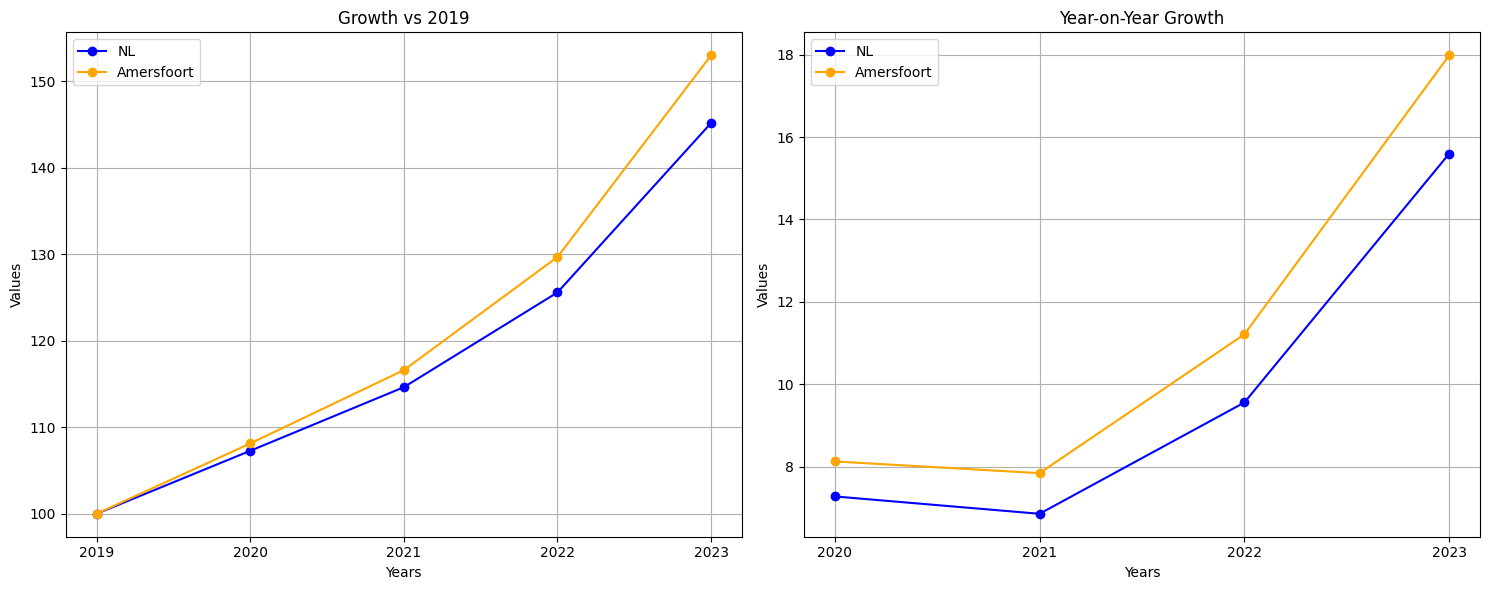

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming rounded_comparison_df is your DataFrame with the data
years = rounded_comparison_df.index

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first data (NL and Amersfoort growth)
axs[0].plot(years, rounded_comparison_df['NL_Growth'], marker='o', label='NL', color='blue')
axs[0].plot(years, rounded_comparison_df['Amersfoort_Growth'], marker='o', label='Amersfoort', color='orange')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Values')
axs[0].set_title('Growth vs 2019')
axs[0].legend()
axs[0].grid(True)


# Plot the second data (NL_YoY_Growth and Amersfoort_YoY_Growth)
axs[1].plot(years, rounded_comparison_df['NL_YoY_Growth'], marker='o', label='NL', color='blue')
axs[1].plot(years, rounded_comparison_df['Amersfoort_YoY_Growth'], marker='o', label='Amersfoort', color='orange')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Values')
axs[1].set_title('Year-on-Year Growth')
axs[1].legend()
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



So house prices have increased YoY harder in Amersfoort then in NL since 2019. 

# Step 4: Modeling

Data modeling:

To model the house prices, I used a simple linear regression model:

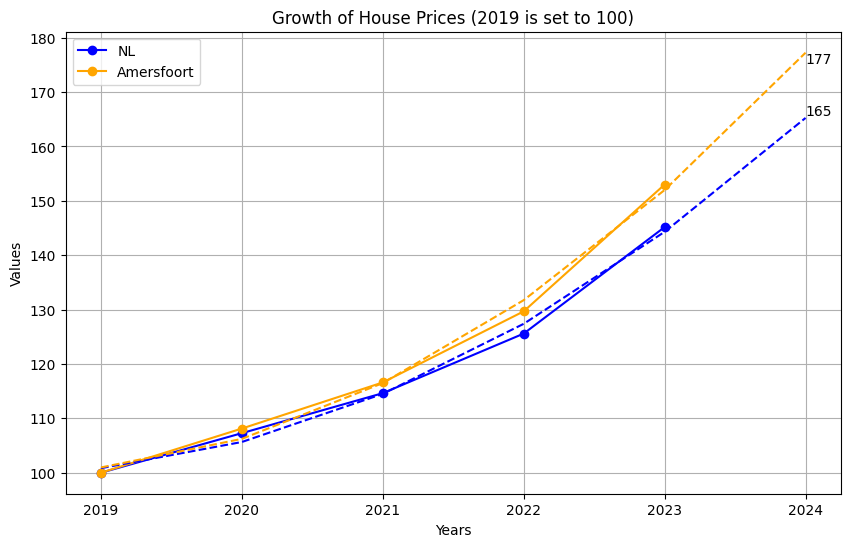

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Convert years to numeric type and include 2024 for prediction
years = rounded_comparison_df.index.astype(int).tolist() + [2024]

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first data (NL and Amersfoort growth)
ax.plot(years[:-1], rounded_comparison_df['NL_Growth'], marker='o', label='NL', color='blue')
ax.plot(years[:-1], rounded_comparison_df['Amersfoort_Growth'], marker='o', label='Amersfoort', color='orange')
ax.set_xlabel('Years')
ax.set_ylabel('Values')
ax.set_title('Growth of House Prices (2019 is set to 100)')
ax.legend()
ax.grid(True)

# Fit a second-order polynomial for the first data and plot the trendline
coefficients_nl = np.polyfit(years[:-1], rounded_comparison_df['NL_Growth'], 2)
trendline_nl = np.poly1d(coefficients_nl)
ax.plot(years, trendline_nl(years), linestyle='dashed', color='blue', label='Trendline (NL)')

coefficients_amersfoort = np.polyfit(years[:-1], rounded_comparison_df['Amersfoort_Growth'], 2)
trendline_amersfoort = np.poly1d(coefficients_amersfoort)
ax.plot(years, trendline_amersfoort(years), linestyle='dashed', color='orange', label='Trendline (Amersfoort)')

# Add predicted values next to the trendline for 2024
plt.text(2024, trendline_nl(2024), f'{trendline_nl(2024):.0f}', ha='left', va='bottom')
plt.text(2024, trendline_amersfoort(2024), f'{trendline_amersfoort(2024):.0f}', ha='left', va='top')

# Manually set x-axis tick positions and labels as integers (without decimal values)
ax.set_xticks(years)
ax.set_xticklabels(years)

# Show the plot
plt.show()



# Step 5: Evaluation

In [35]:
import statsmodels.api as sm

# Model again in a different way, could be done before as well

# Convert years to numeric type
years = rounded_comparison_df.index.astype(int) 

# Function to get the equation of the trendline
def get_equation(coefficients):
    """
    Construct a quadratic equation string from the given coefficients.

    The equation will be in the format "y = ax^2 + bx + c", with the 
    coefficients rounded to two decimal places.

    Args:
        coefficients (tuple): A tuple of three numbers representing the 
                              coefficients (a, b, c) of a quadratic equation.

    Returns:
    str: The quadratic equation in string format.
    """
    a, b, c = coefficients
    equation = f"y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}"
    return equation

# Function to fit a second degree polynomial and get the regression results
def get_polynomial_regression_results(x, y):
    """
    Fit a second degree polynomial to the input data and return the regression results.

    This function creates an additional feature for the square of x, and then uses
    statsmodels' OLS method to fit the polynomial. 

    Args:
        x (array_like): A 1-D array containing the x-coordinates of the data points.
        y (array_like): A 1-D array containing the y-coordinates of the data points.

    Returns:
        RegressionResults: A RegressionResults class instance that encapsulates 
                           the results of the regression.
    """
    # Create a 2-D array where the first column is the square of x and 
    # the second column is x itself
    X = np.column_stack((x**2, x))

    # Add a column of ones for the intercept term
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    return results

# Fit a second-order polynomial for the first data (NL and Amersfoort growth)
coefficients_nl = np.polyfit(years, rounded_comparison_df['NL_Growth'], 2)
coefficients_amersfoort = np.polyfit(years, rounded_comparison_df['Amersfoort_Growth'], 2)

# Get the equations of the trendlines
equation_nl = get_equation(coefficients_nl)
equation_amersfoort = get_equation(coefficients_amersfoort)

# Get regression results and R-squared for the first data
results_nl = get_polynomial_regression_results(years, rounded_comparison_df['NL_Growth'])
results_amersfoort = get_polynomial_regression_results(years, rounded_comparison_df['Amersfoort_Growth'])

r_squared_nl = results_nl.rsquared
r_squared_amersfoort = results_amersfoort.rsquared

# Report output
print("Get equations and use R2 as evaluation metric:\n")

print("NL Growth:")
print("Equation:", equation_nl)
print("R-squared:", r_squared_nl)
print()

print("Amersfoort Growth:")
print("Equation:", equation_amersfoort)
print("R-squared:", r_squared_amersfoort)
print()

Get equations and use R2 as evaluation metric:

NL Growth:
Equation: y = 2.02x^2 + -8137.52x + 8212092.18
R-squared: 0.9940949892906683

Amersfoort Growth:
Equation: y = 2.50x^2 + -10087.14x + 10180284.23
R-squared: 0.9943067330322495



# Step 6: Deployment

In [37]:
# Predict values for 2024 compared to 2019
year_2024 = 2024
nl_growth_2024 = trendline_nl(year_2024)
amersfoort_growth_2024 = trendline_amersfoort(year_2024)

print("Predicted values for 2024, compared to base year 2019 with value 100:")
print(f"NL Growth: {nl_growth_2024:.2f}")
print(f"Amersfoort Growth: {amersfoort_growth_2024:.2f}")

Predicted values for 2024, compared to base year 2019 with value 100:
NL Growth: 165.25
Amersfoort Growth: 177.24


In [38]:
# Predict values for 2024 compared to 2023
year_2023 = 2023
nl_growth_yoy = (trendline_nl(year_2024) - trendline_nl(year_2023))/trendline_nl(year_2023) * 100
amersfoort_growth_yoy = (trendline_amersfoort(year_2024) - trendline_amersfoort(year_2023))/trendline_amersfoort(year_2023) * 100

print("Predicted values for 2024, compared to 2023:")
print(f"NL Growth YoY in %: {nl_growth_yoy:.2f}")
print(f"Amersfoort Growth YoY in %: {amersfoort_growth_yoy:.2f}")

Predicted values for 2024, compared to 2023:
NL Growth YoY in %: 14.52
Amersfoort Growth YoY in %: 16.61


Vizualize:

I can also vizualize this data with bar plots and trend lines to support any findings and gather insights

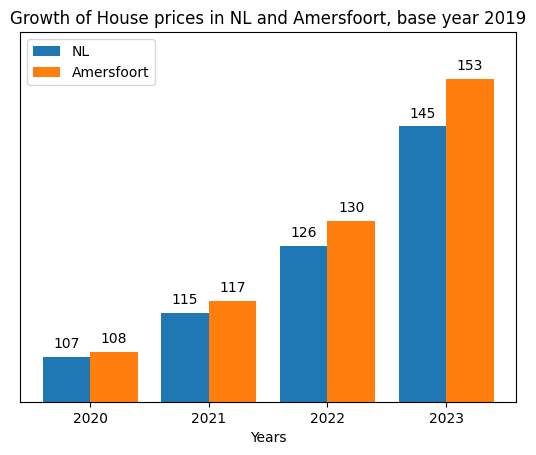

In [39]:

import matplotlib.pyplot as plt

# Convert the index to integers if they are strings
years = [int(year) for year in rounded_comparison_df.index][1:]

# Get the values for NL and Amersfoort
NL = rounded_comparison_df['NL_Growth'][1:]
Amersfoort = rounded_comparison_df['Amersfoort_Growth'][1:]

# Plotting the barplot
fig, ax = plt.subplots()
width = 0.4  # Width of the bars

# Create bars for NL and Amersfoort columns, offsetting Amersfoort by the width
bars1 = ax.bar([year - width/2 for year in years], NL, width, label='NL')
bars2 = ax.bar([year + width/2 for year in years], Amersfoort, width, label='Amersfoort')

# Add values above the bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.0f}', ha='center', va='bottom')


# Add labels, title and legend
ax.set_xlabel('Years')
# ax.set_ylabel('Values')
ax.set_title('Growth of House prices in NL and Amersfoort, base year 2019')
ax.legend()

plt.xticks(years)  # Set x-ticks to the years
plt.ylim(100,)  # Set y-axis to start from 100
plt.yticks([])  # Hide the y-axis

plt.show()


Business Questions to address
- What is the average price increase for houses in The Netherlands in 2023 compared to 2019: 45 %
- What is the average price increase for houses in the municipality Amersfoort in 2023 compared to 2019: 53 %
- What is the predicted average price increase for houses in The Netherlands for 2024 compared to 2019: 65 %
- What is the predicted average price increase for houses in Amersfoort for 2024 compared to 2019: 77 %
